
## Equipo:
Knights of Cydonia

### Integrantes:
1. Avalos González Joel Sebastian
2. Castañon Maldonado Carlos Emilio
3. Sánchez Castro Gustavo
4. Luz Maria Reyes Ramos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Nuevas Librearias.
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/mnist_train.csv')
#df = df.dropna()
print(len(df))

59999


In [ ]:
df = df.to_numpy()
#Funcion para calcular la media de cada clase
def calcular_media(X,y,clase):
  return np.mean(X[y==clase],axis=0)

#### Preprocesamiento de datos Mnist

In [ ]:
X = df[:,1:]
y = df[:,0]
#Creacion de los modelos con sklearn.
pca_model = PCA(n_components=100) # n_components = min (muestras, caracteristicas) para PCA.
lda_model = LinearDiscriminantAnalysis() # n_components = min (clases-1, caracteristicas) para LDA. n_components=min(10-1,768)
knn_model = KNeighborsClassifier(n_neighbors=5) # Solo necesitamos especificar adecuadamente el número de vecinos.

In [ ]:
#Entrenamiento de los modelos de reducción dimensiomal
X_pca = pca_model.fit_transform(X)
X_lda = lda_model.fit_transform(X,y)

## 1. Realiza lo siguiente:
* (a) Carga el dataset completo de Mnist y usa PCA para reducirlo a 2 componentes. Finalmente separa los datos correspondientes a 1, 5 y 7. Gráfica los datos.
* (b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.
* (c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

## (a)

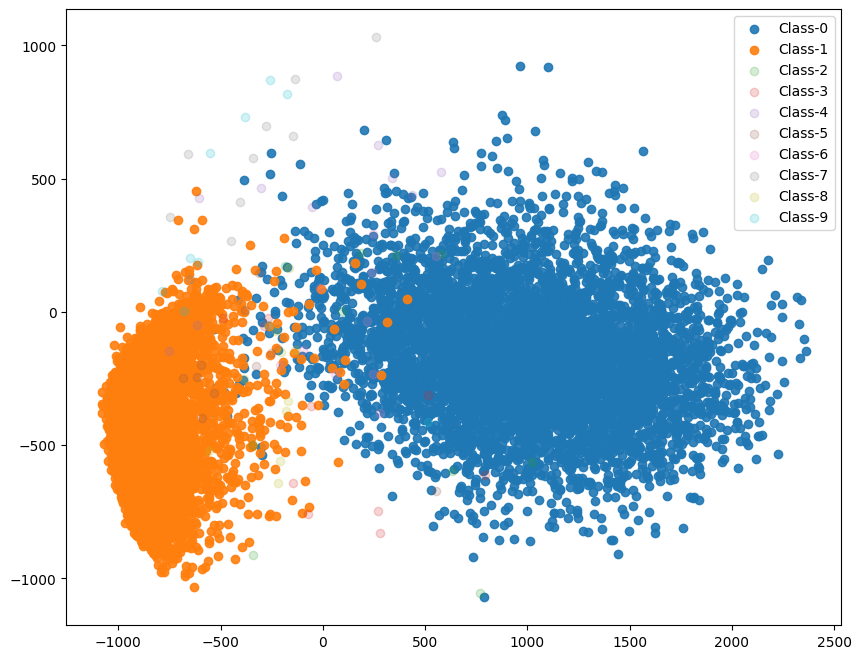

In [ ]:
#Grafica de PCA
select = [0,1] #list(range(10)) #[0,1] list(range(10))#
PCA_comp_0,PCA_comp_1 = 0,1

#Valores de cada clase
fig = plt.figure(figsize=(10, 8))
for num in range(0,10):
  if num not in select:
    plt.scatter(X_pca[y==num,PCA_comp_0][:10],X_pca[y==num,PCA_comp_1][:10], label=f'Class-{num}',alpha=.2)

  elif num in select:
    plt.scatter(X_pca[y==num,PCA_comp_0][:],X_pca[y==num,PCA_comp_1][:], label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

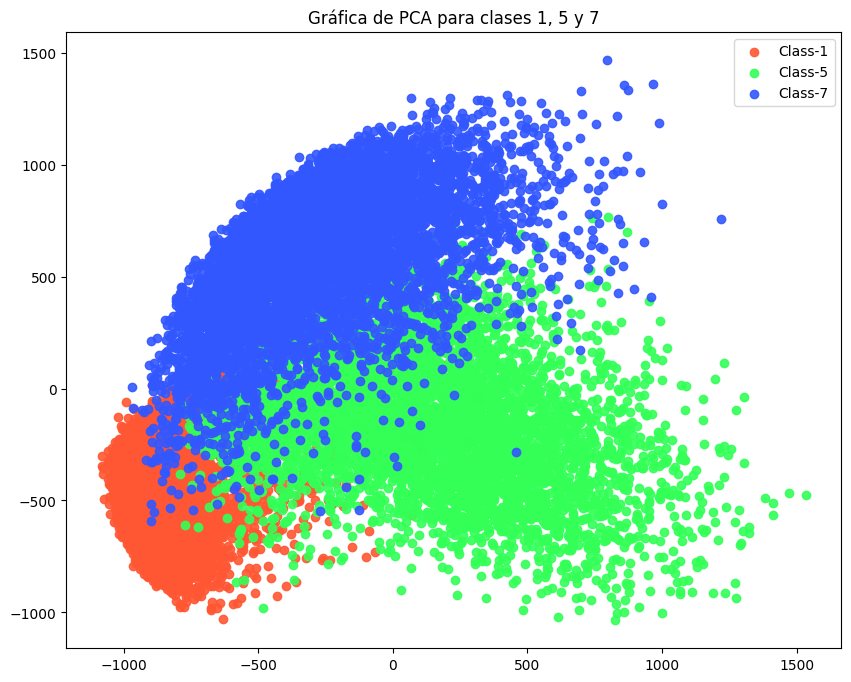

In [ ]:
# Clases a seleccionar
select_classes = [1, 5, 7]
colors = ['#FF5733', '#33FF57', '#3357FF']

fig = plt.figure(figsize=(10, 8))

for idx, num in enumerate(select_classes):
    plt.scatter(X_pca[y == num, PCA_comp_0][:], X_pca[y == num, PCA_comp_1][:], label=f'Class-{num}', color=colors[idx], alpha=0.9)

# Legends
plt.legend()
plt.title('Gráfica de PCA para clases 1, 5 y 7')
plt.show()

## (b)

In [ ]:
# Filtrar los datos para las clases 1, 5 y 7
selected_classes = [1, 5, 7]
indices = [idx for idx, label in enumerate(y) if label in selected_classes]
X_selected = X_pca[indices]
y_selected = y[indices]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Entrenar el modelo K-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación para K-NN (k=3) en las clases 1, 5 y 7:")
print(report)


Reporte de clasificación para K-NN (k=3) en las clases 1, 5 y 7:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1315
           5       1.00      1.00      1.00      1091
           7       1.00      0.99      0.99      1280

    accuracy                           1.00      3686
   macro avg       1.00      1.00      1.00      3686
weighted avg       1.00      1.00      1.00      3686



## (c)

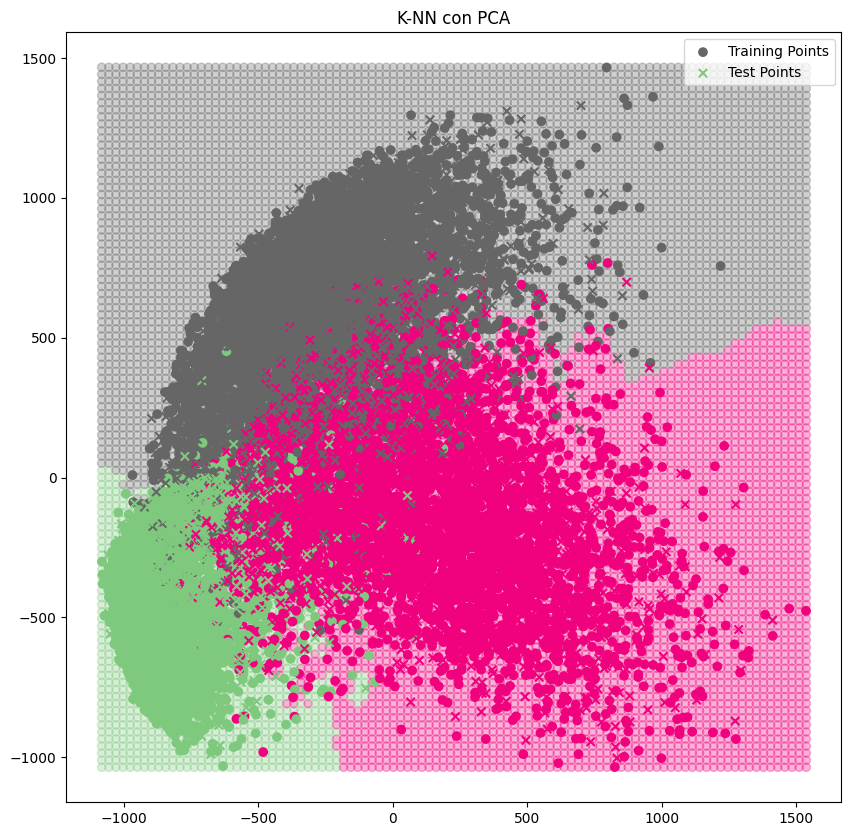

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Suponiendo que 'X' contiene tus datos originales y 'y' son las etiquetas

# Realizar PCA para reducir a dos componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Filtrar los datos para las clases 1, 5 y 7
selected_classes = [1, 5, 7]
indices = [idx for idx, label in enumerate(y) if label in selected_classes]
X_selected = X_pca[indices]
y_selected = y[indices]

# Crear un modelo K-NN con dos dimensiones
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_selected, y_selected)  # Ajustar con los datos transformados por PCA

# Definir los límites para la malla de visualización
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

# Crear una malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Realizar predicciones en la malla usando el modelo K-NN entrenado con PCA
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Graficar la malla de clasificación y los puntos
plt.figure(figsize=(10, 10), dpi=100)

# Graficar los puntos de X_space según su clase asignada
plt.scatter(xx, yy, c=Z, cmap='Accent', alpha=0.3)

# Graficar los puntos originales transformados por PCA
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Accent', label='Training Points')

# Graficar los puntos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap='Accent', label='Test Points')

plt.title('K-NN con PCA')
plt.legend()
plt.show()




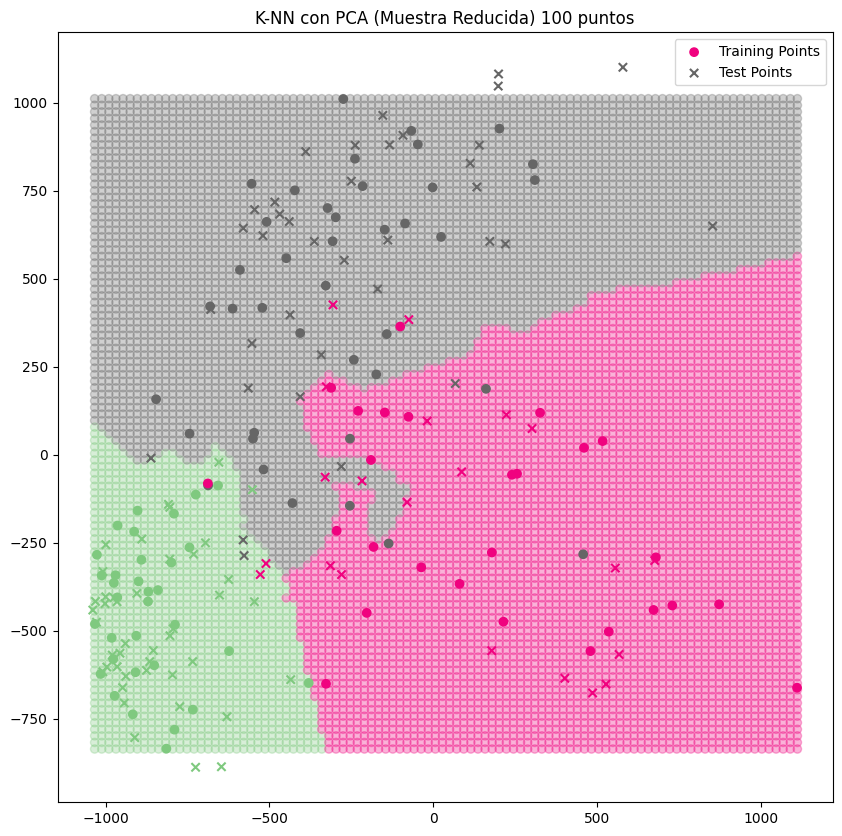

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Tomar una muestra aleatoria de los datos de entrenamiento y prueba
sample_size = 100  # Establecer el tamaño de la muestra
random_train_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
random_test_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)

X_train_sampled = X_train[random_train_indices]
y_train_sampled = y_train[random_train_indices]

X_test_sampled = X_test[random_test_indices]
y_test_sampled = y_test[random_test_indices]

# Crear un modelo K-NN con dos dimensiones
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_sampled, y_train_sampled)  # Ajustar con la muestra de datos transformados por PCA

# Definir los límites para la malla de visualización
x_min, x_max = X_train_sampled[:, 0].min() - 1, X_train_sampled[:, 0].max() + 1
y_min, y_max = X_train_sampled[:, 1].min() - 1, X_train_sampled[:, 1].max() + 1

# Crear una malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Realizar predicciones en la malla usando el modelo K-NN entrenado con PCA
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la malla de clasificación y los puntos
plt.figure(figsize=(10, 10), dpi=100)

# Graficar los puntos de X_space según su clase asignada
plt.scatter(xx, yy, c=Z, cmap='Accent', alpha=0.3)

# Graficar los puntos de entrenamiento y prueba
plt.scatter(X_train_sampled[:, 0], X_train_sampled[:, 1], c=y_train_sampled, cmap='Accent', label='Training Points')
plt.scatter(X_test_sampled[:, 0], X_test_sampled[:, 1], marker='x', c=y_test_sampled, cmap='Accent', label='Test Points')

plt.title('K-NN con PCA (Muestra Reducida) 100 puntos')
plt.legend()
plt.show()


## 2. Realiza lo siguiente.
* (a) Carga el dataset completo de Mnist y usa LDA para reducirlo a 2 componentes. Finalmente separa los datos
correspondientes a 1, 5 y 7. Gráfica los datos.
* (b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.
* (c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

## (a)



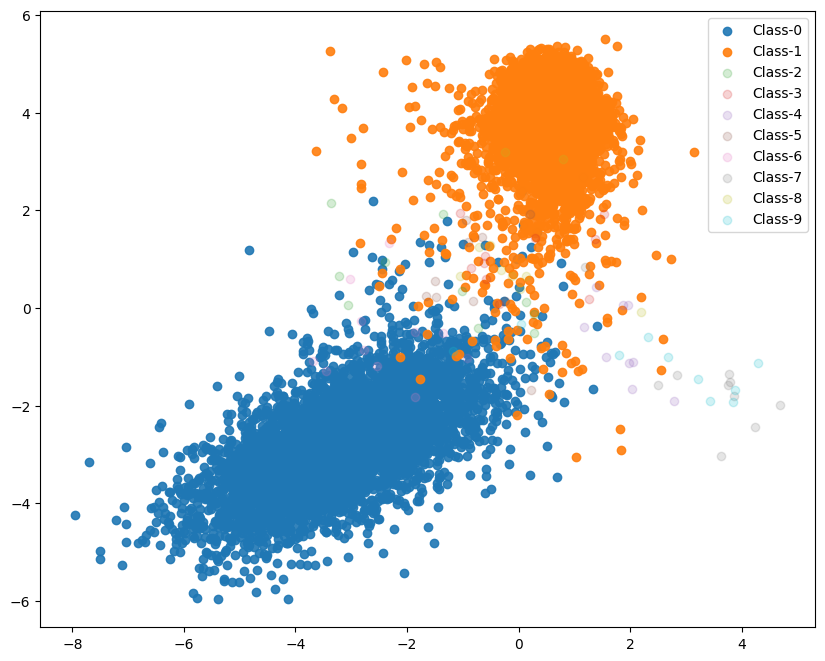

In [ ]:
#Grafica de LDA
select = [0,1] #list(range(10)) #[0,1] list(range(10))#
LDA_comp_0,LDA_comp_1 = 0,1

#Valores de cada clase
fig = plt.figure(figsize=(10, 8))
for num in range(0,10):
  if num not in select:
    plt.scatter(X_lda[y==num,LDA_comp_0][:10],X_lda[y==num,LDA_comp_1][:10], label=f'Class-{num}',alpha=.2)

  elif num in select:
    plt.scatter(X_lda[y==num,LDA_comp_0][:],X_lda[y==num,LDA_comp_1][:], label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

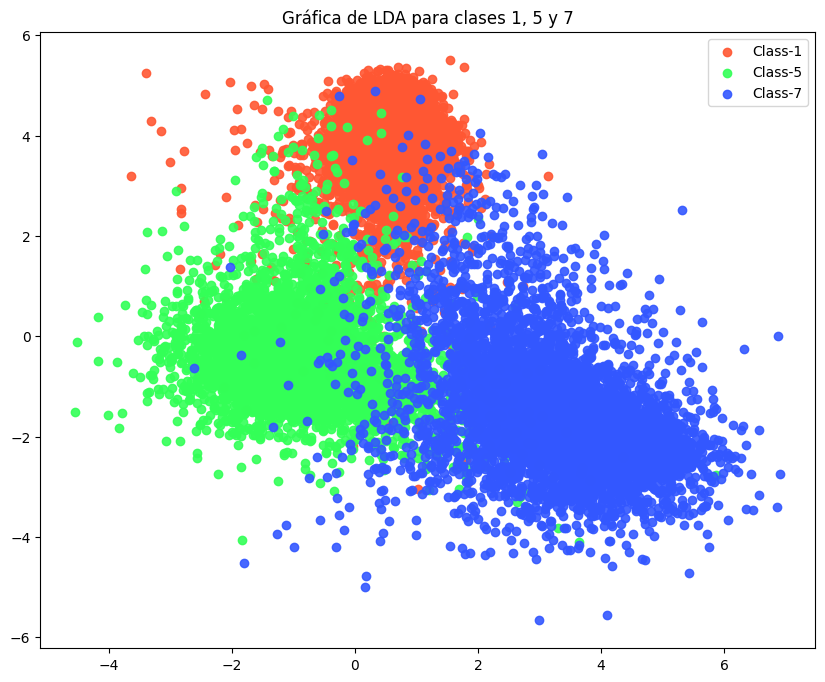

In [ ]:
# Clases a seleccionar
select_classes = [1, 5, 7]
colors = ['#FF5733', '#33FF57', '#3357FF']

fig = plt.figure(figsize=(10, 8))

for idx, num in enumerate(select_classes):
    plt.scatter(X_lda[y == num, LDA_comp_0][:], X_lda[y == num, LDA_comp_1][:], label=f'Class-{num}', color=colors[idx], alpha=0.9)

# Legends
plt.legend()
plt.title('Gráfica de LDA para clases 1, 5 y 7')
plt.show()

In [ ]:
# Filtrar los datos para las clases 1, 5 y 7
selected_classes = [1, 5, 7]
indices = [idx for idx, label in enumerate(y) if label in selected_classes]
X_selected = X_lda[indices]
y_selected = y[indices]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Entrenar el modelo K-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación para K-NN (k=3) en las clases 1, 5 y 7:")
print(report)

Reporte de clasificación para K-NN (k=3) en las clases 1, 5 y 7:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1315
           5       0.99      0.97      0.98      1091
           7       0.99      0.99      0.99      1280

    accuracy                           0.99      3686
   macro avg       0.99      0.98      0.99      3686
weighted avg       0.99      0.99      0.99      3686



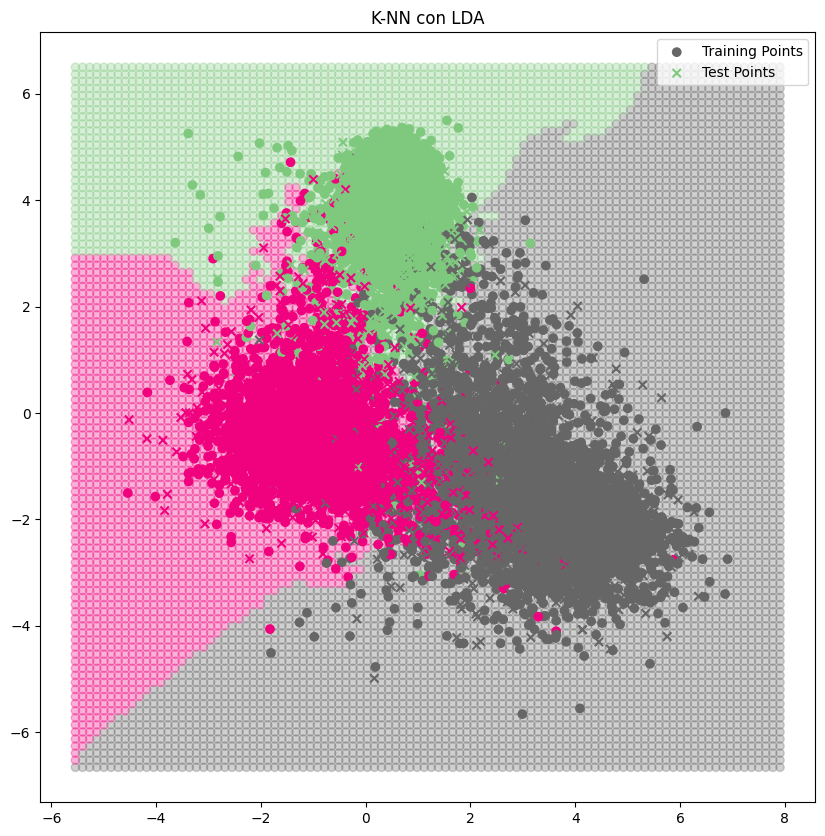

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

# Suponiendo que 'X' contiene tus datos originales y 'y' son las etiquetas

# Realizar LDA para reducir a dos componentes
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)  # Ajustar LDA con etiquetas 'y'

# Filtrar los datos para las clases 1, 5 y 7
selected_classes = [1, 5, 7]
indices = [idx for idx, label in enumerate(y) if label in selected_classes]
X_selected = X_lda[indices]
y_selected = y[indices]

# Crear un modelo K-NN con dos dimensiones
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(X_selected, y_selected)  # Ajustar con los datos transformados por LDA

# Definir los límites para la malla de visualización
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1

# Crear una malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Realizar predicciones en la malla usando el modelo K-NN entrenado con LDA
Z = knn_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Graficar la malla de clasificación y los puntos
plt.figure(figsize=(10, 10), dpi=100)

# Graficar los puntos de la malla según su clase asignada
plt.scatter(xx, yy, c=Z, cmap='Accent', alpha=0.3)

# Graficar los puntos originales transformados por LDA
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Accent', label='Training Points')

# Graficar los puntos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap='Accent', label='Test Points')

plt.title('K-NN con LDA')
plt.legend()
plt.show()


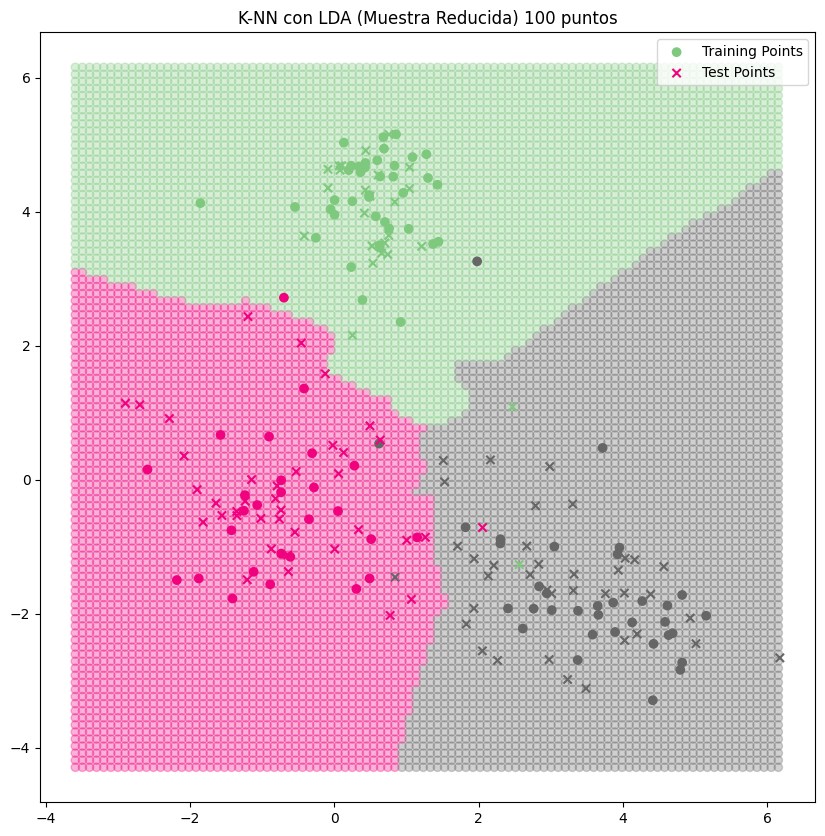

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Tomar una muestra aleatoria de los datos de entrenamiento y prueba
sample_size = 100  # Establecer el tamaño de la muestra
random_train_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
random_test_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)

X_train_sampled = X_train[random_train_indices]
y_train_sampled = y_train[random_train_indices]

X_test_sampled = X_test[random_test_indices]
y_test_sampled = y_test[random_test_indices]

# Crear un modelo K-NN con dos dimensiones
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(X_train_sampled, y_train_sampled)  # Ajustar con la muestra de datos transformados por LDA

# Definir los límites para la malla de visualización
x_min, x_max = X_train_sampled[:, 0].min() - 1, X_train_sampled[:, 0].max() + 1
y_min, y_max = X_train_sampled[:, 1].min() - 1, X_train_sampled[:, 1].max() + 1

# Crear una malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Realizar predicciones en la malla usando el modelo K-NN entrenado con LDA
Z = knn_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la malla de clasificación y los puntos
plt.figure(figsize=(10, 10), dpi=100)

# Graficar los puntos de X_space según su clase asignada
plt.scatter(xx, yy, c=Z, cmap='Accent', alpha=0.3)

# Graficar los puntos de entrenamiento y prueba
plt.scatter(X_train_sampled[:, 0], X_train_sampled[:, 1], c=y_train_sampled, cmap='Accent', label='Training Points')
plt.scatter(X_test_sampled[:, 0], X_test_sampled[:, 1], marker='x', c=y_test_sampled, cmap='Accent', label='Test Points')

plt.title('K-NN con LDA (Muestra Reducida) 100 puntos')
plt.legend()
plt.show()

## 3. Discutan en equipos los reportes de clasificación de los inciso 1b y 2b.
 * ¿Qué modelo es mejor para separar estas clases y clasificar las mediante K-NN?

Tanto el modelo LDA como el PCA lograron excelentes resultados al clasificar las clases 1, 5 y 7 usando el algoritmo K-NN con k=3. Ambos modelos mostraron altos niveles de **precisión**, **recall **y **f1-score**, lo que significa que fueron capaces de distinguir muy bien entre estas clases.

Notamos algunas diferencias notables entre los dos modelos:

1. **Precisión perfecta en PCA:** El modelo PCA logró una precisión perfecta para todas las clases. Esto indica que no cometió errores al predecir ninguna de las clases 1, 5 o 7, es decir, no predijo incorrectamente ninguna instancia como positiva cuando en realidad era negativa.

2. **Menor precisión en LDA para la clase 5**: En contraste, el modelo LDA tuvo una precisión ligeramente menor para la clase 5 en comparación con el PCA. Esto sugiere que el modelo LDA pudo haber tenido algunos casos donde predijo la clase 5 incorrectamente más a menudo que el PCA.


3. **Recall y f1-score similares:** Ambos modelos tuvieron valores muy cercanos en recall y f1-score, lo que indica que pudieron encontrar correctamente la mayoría de las instancias relevantes para cada clase, logrando un equilibrio entre la precisión y la exhaustividad en sus predicciones.


Si se prioriza una precisión perfecta sin errores en ninguna clase, el modelo PCA parece tener un rendimiento ligeramente superior al modelo LDA en esta tarea específica. A pesar de esto, ambos modelos demostraron un buen rendimiento en la clasificación de estas clases particulares con K-NN y k=3.












## 4. De acuerdo a lo visto en clase sobre el perceptrón simple.
* (a) Mencionen el valor del peso wj correspondiente al valor del bias o sesgo que se obtiene en clase.
  
  El valor del peso wj correspondiente al valor del bias o sesgo es 0.6.

* (b) Creen una función que calcule el valor predicho por la neurona sin modificar los pesos de la red.

  Realmente no se modifican los pesos de la red, solo se calcula el valor de la neurona.


* (c) Cree una función que calcule el error cuadrático medio(ECM).
  

* (d) Realiza una gráfica de linea del comportamiento del ECM para 30 épocas. Usando n = 1, .2, .02
  ¿Cuál o cuales valores de n (taza de aprendizaje) funcionan de forma más adecuada?¿Cuales no?
  Argumente su respuestas ayudándose de la gráfica.
  
  Segun podemos veer en la grafica el valor de n = 0.2 es el que mejor se comporta ya que es el que tiene un error mas bajo, mientras que
  el valor de n = 0.02 es el que peor se comporta ya que es el que tiene un error mas alto.

Valor del peso correspondiente al bias: 0.6159412247156208


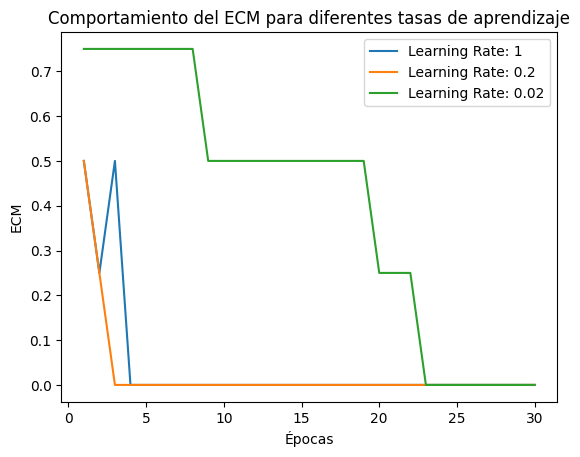

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para el perceptrón simple
class Perceptron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()

    def predict(self, inputs):
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def compute_mse(self, inputs, targets):
        predictions = np.array([self.predict(x) for x in inputs])
        return np.mean((predictions - targets) ** 2)

    def train(self, inputs, targets, learning_rate, epochs):
        mse_values = []
        for epoch in range(epochs):
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i])
                error = targets[i] - prediction
                self.weights += learning_rate * error * inputs[i]
                self.bias += learning_rate * error

            mse = self.compute_mse(inputs, targets)
            mse_values.append(mse)

        return mse_values


# Datos de ejemplo
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Crear perceptrón
perceptron = Perceptron(num_inputs=2)

# (a) Valor del peso correspondiente al bias
print("Valor del peso correspondiente al bias:", perceptron.bias)

# (b) Función para calcular el valor predicho por la neurona
def predict_value(inputs):
    return perceptron.predict(inputs)

# (c) Función para calcular el Error Cuadrático Medio (ECM)
def calculate_mse(inputs, targets):
    return perceptron.compute_mse(inputs, targets)

# (d) Gráfica del comportamiento del ECM para diferentes tasas de aprendizaje
learning_rates = [1, 0.2, 0.02]
epochs = 30
for lr in learning_rates:
    perceptron = Perceptron(num_inputs=2)
    mse_values = perceptron.train(inputs, targets, lr, epochs)
    plt.plot(range(1, epochs + 1), mse_values, label=f"Learning Rate: {lr}")

plt.xlabel('Épocas')
plt.ylabel('ECM')
plt.legend()
plt.title('Comportamiento del ECM para diferentes tasas de aprendizaje')
plt.show()
